In [1]:
conda --version

conda 4.10.3

Note: you may need to restart the kernel to use updated packages.


### Overview
The data has been split into two groups:
* training set (train.csv)
* test set (test.csv)
The training is set used to build The machine learning models. 

The test set is used to see how well The model performs on unseen data. For the test set, We will predict if this Passenger is Survived or Sinked

The gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Describe : -
#### survival  ====> Survival  
 * 0 = No
 * 1 = Yes
#### pclass    ====> Ticket class  
 * 1 = 1st
 * 2 = 2nd
 * 3 = 3rd
#### sex       ====> Sex
#### Age       ====> Age in years
#### sibsp     ====> # of siblings / spouses aboard the Titanic	
#### parch     ====> # of parents / children aboard the Titanic	
#### ticket    ====> Ticket number
#### fare      ====> Passenger fare
#### cabin     ====> Cabin number
#### embarked  ====> Port of Embarkation
* C = Cherbourg 
* Q = Queenstown
* S = Southampton


In [2]:
# Importing the Important Library :

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Importing The Training Dataset :

train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape

(891, 12)

In [5]:
# general view about missing data on Training Dataset:

train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill The missing training data on Age with mean :

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
train_data['Age'] = imp.fit_transform(np.array(train_data['Age']).reshape(-1,1)).astype(int)

In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# drop unnecessary Columns :

train_data = train_data.drop(['PassengerId','Name' , 'Fare' , 'Ticket' , "Cabin"], axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22,1,0,S
1,1,1,female,38,1,0,C
2,1,3,female,26,0,0,S
3,1,1,female,35,1,0,S
4,0,3,male,35,0,0,S


In [9]:
train_data.shape

(891, 7)

In [10]:
# Convert string value with numerical :

from sklearn.preprocessing import LabelEncoder 
en = LabelEncoder()
train_data['Sex'] = en.fit_transform(train_data['Sex'])
train_data['Embarked'] = en.fit_transform(train_data['Embarked'])
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22,1,0,2
1,1,1,0,38,1,0,0
2,1,3,0,26,0,0,2
3,1,1,0,35,1,0,2
4,0,3,1,35,0,0,2


In [11]:
# Split the Training Dataset to  Features and Target :

X_train = train_data.drop('Survived' , axis = 1)
y_train = train_data.Survived

print(f" The Shape of X_train = {X_train.shape}\n The shape of y_train = {y_train.shape} ")

 The Shape of X_train = (891, 6)
 The shape of y_train = (891,) 


In [12]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22,1,0,2
1,1,1,0,38,1,0,0
2,1,3,0,26,0,0,2
3,1,1,0,35,1,0,2
4,0,3,1,35,0,0,2


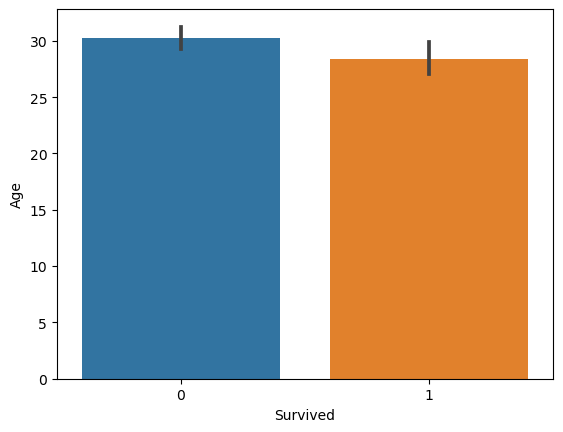

In [13]:
sns.set_theme = "ticks"
sns.barplot(x = y_train , y = train_data["Age"])
plt.show()

In [14]:
# Importing The Test Dataset :

test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
# general view about missing data on Testing Dataset :

test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
# Fill The missing testing data on Age with mean :

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
test_data['Age'] = imp.fit_transform(np.array(test_data["Age"]).reshape(-1,1)).astype(int)

In [17]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
# drop unnecessary Columns :

test_data = test_data.drop(['PassengerId','Name' , 'Fare' , 'Ticket' , "Cabin"], axis=1)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34,0,0,Q
1,3,female,47,1,0,S
2,2,male,62,0,0,Q
3,3,male,27,0,0,S
4,3,female,22,1,1,S


In [19]:
# Convert string value with numerical :

from sklearn.preprocessing import LabelEncoder 
en = LabelEncoder()
test_data['Sex'] = en.fit_transform(test_data['Sex'])
test_data['Embarked'] = en.fit_transform(test_data['Embarked'])
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34,0,0,1
1,3,0,47,1,0,2
2,2,1,62,0,0,1
3,3,1,27,0,0,2
4,3,0,22,1,1,2


In [20]:
# Importing The Anothe Testing Dataset :

test_data2 = pd.read_csv('data/gender_submission.csv')
test_data2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [21]:
test_data2.isna().sum()

PassengerId    0
Survived       0
dtype: int64

In [22]:
# Split the Testing Dataset to  Features and Target :

X_test = test_data
y_test = test_data2['Survived']

In [23]:
print(f"""
At The final :\n
The Shape of X_train : {X_train.shape} .
The Shape of y_train : {y_train.shape} .
The Shape of X_test  : {X_test.shape} .
The Shape of y_test  : {y_test.shape} .
""")


At The final :

The Shape of X_train : (891, 6) .
The Shape of y_train : (891,) .
The Shape of X_test  : (418, 6) .
The Shape of y_test  : (418,) .



In [24]:
# It is a Collection of Machine Learning Algorithms To Estimate And Select The Best Model. 

# Classification : 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

models = {'Logestic_Regression' : LogisticRegression() ,
          'KNN' : KNeighborsClassifier() ,
          'Random_Forest_Classifier' : RandomForestClassifier() ,
          'SVC' : SVC() ,
          'Decision_Tree' : DecisionTreeClassifier()
          }

def fit_and_score(models , X_train , X_test , y_train , y_test) :
    model_scores = {}
    model_confusion = {}
    for name , model in models.items() :
        # fitting the data :
        model.fit(X_train , y_train)
        model_scores[name] = model.score(X_test , y_test)
        y_predict = model.predict(X_test)
        model_confusion[name] = confusion_matrix(y_test , y_predict)
    return model_scores , model_confusion


In [25]:
# Calling the Function :

fit_and_score(models = models ,
              X_train = X_train,X_test = X_test,
              y_train = y_train,y_test = y_test )

({'Logestic_Regression': 0.9401913875598086,
  'KNN': 0.7296650717703349,
  'Random_Forest_Classifier': 0.7751196172248804,
  'SVC': 0.638755980861244,
  'Decision_Tree': 0.7703349282296651},
 {'Logestic_Regression': array([[252,  14],
         [ 11, 141]]),
  'KNN': array([[218,  48],
         [ 65,  87]]),
  'Random_Forest_Classifier': array([[224,  42],
         [ 52, 100]]),
  'SVC': array([[258,   8],
         [143,   9]]),
  'Decision_Tree': array([[219,  47],
         [ 49, 103]])})

### Great .....
#### The Best Machine Learning Algorithm With a Best Accuracy : Logestic_Regression .


The Score Of Model   : 0.9401913875598086 .
The accuracy Score   : 0.9401913875598086 .
The Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       266
           1       0.91      0.93      0.92       152

    accuracy                           0.94       418
   macro avg       0.93      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418


The Confusion Matrix : [[252  14]
 [ 11 141]]


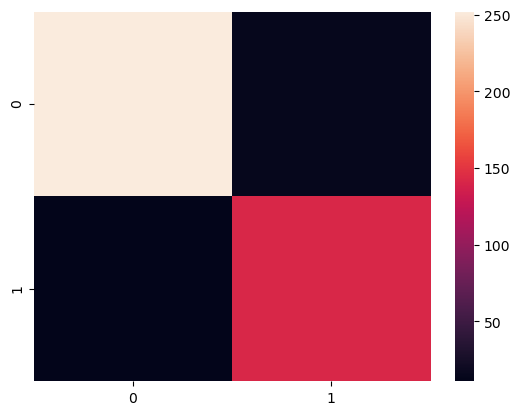

In [26]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test , y_pred)
heat = sns.heatmap(cm)
print(f"""
The Score Of Model   : {lr.score(X_test , y_test)} .
The accuracy Score   : {accuracy_score(y_test , y_pred)} .
The Classification Report \n {classification_report(y_test , y_pred)}
""")
print(f"The Confusion Matrix : {cm}")
plt.show()